<a href="https://colab.research.google.com/github/yuvens12/projectnine/blob/main/Tubes_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Anggota:

-Yuvens

-Isti

-Edwin

Source data: https://drive.google.com/file/d/1TKveTkzWcGLVS_XWjnmjH1Nrs0WV2iGa/view?usp=share_link

Dataset diperoleh dari situs data.world mengenai judul dan rating film yang dapat diakses dengan sah pada platform streaming Netflix. Terdapat 7 kolom atribut dan 1000 row. Ketujuh atribut itu adalah : 
1. title
2. rating
3. ratingLevel
4. ratingDescription
5. release year
6. user rating score
7. user rating size

# **Import Package**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# **Load** **Data**

In [ ]:
df = pd.read_csv('sample_data/netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


# **PREPROSESING**

Info Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


Summary data

In [ ]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


Ubah nama karena data dalam bahasa inggris 

In [ ]:
df.rename(columns={'title': 'judul', 'rating': 'rate usia', 'ratingLevel': 'levelperingkat',	'ratingDescription': 'deskripsirating', 'release year': 'tahunrilis', 'user rating score': 'skorpenilaianpengguna', 'user rating size': 'ukuranperingkatpengguna'}, inplace=True)

Cek Missing Value

In [ ]:
#Cek missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   judul                    1000 non-null   object 
 1   rate usia                1000 non-null   object 
 2   levelperingkat           941 non-null    object 
 3   deskripsirating          1000 non-null   int64  
 4   tahunrilis               1000 non-null   int64  
 5   skorpenilaianpengguna    605 non-null    float64
 6   ukuranperingkatpengguna  1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [ ]:
#Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

judul                        0
rate usia                    0
levelperingkat              59
deskripsirating              0
tahunrilis                   0
skorpenilaianpengguna      395
ukuranperingkatpengguna      0
dtype: int64

Jika terdapat missing value, lakukan penanganan terhadap missing value tersebut

In [ ]:
# menghitung ratio missing value
rasio = (jumlah_missing.div(len(df))) * 100
rasio

judul                       0.0
rate usia                   0.0
levelperingkat              5.9
deskripsirating             0.0
tahunrilis                  0.0
skorpenilaianpengguna      39.5
ukuranperingkatpengguna     0.0
dtype: float64

In [ ]:
# Kolom Skor penilaian memiliki tipe data float64 sehingga kita harus mengetahui nilai mean dan median nya terlebih dahulu
df['skorpenilaianpengguna'].describe()

count    605.000000
mean      84.094215
std       12.344371
min       55.000000
25%       75.000000
50%       88.000000
75%       95.000000
max       99.000000
Name: skorpenilaianpengguna, dtype: float64

In [ ]:
# Mengubah null dengan nilai Mean
df['skorpenilaianpengguna'].fillna(int(df['skorpenilaianpengguna'].mean()), inplace=True)

In [ ]:
# gunakan mode nilai yang tidak hilang untuk mengisi nilai yang hilang:
mode = df["levelperingkat"].mode()[0]
df["levelperingkat"].fillna(mode, inplace=True)

In [ ]:
# Cek kembali apakah masih terdapat missing value
pd.isnull(df).sum()

judul                      0
rate usia                  0
levelperingkat             0
deskripsirating            0
tahunrilis                 0
skorpenilaianpengguna      0
ukuranperingkatpengguna    0
dtype: int64

Apakah ada data duplicate?

In [ ]:
# #Cek data duplicate
# duplicate_rows = df[df.duplicated()]
# print(duplicate_rows)

In [ ]:
# df = df.drop_duplicates().reset_index()

In [ ]:
# df[df.duplicated(keep=False)]

Apakah terdapat outlier?

In [ ]:
sample=df['tahunrilis']

Text(0.5, 0, 'Sample')

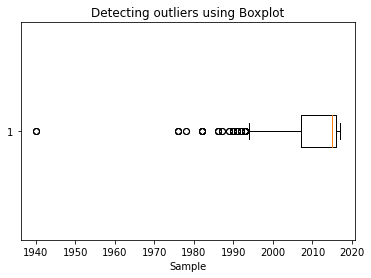

In [ ]:
#Cek data outlier
# Deteksi dengan boxplot
plt.boxplot(list(sample), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
# Deteksi outlier dengan IQR
Q1 = np.percentile(df['tahunrilis'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['tahunrilis'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['tahunrilis'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['tahunrilis'] <= (Q1-1.5*IQR))

Old Shape:  (1000, 7)


In [ ]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

Text(0.5, 0, 'Hasil')

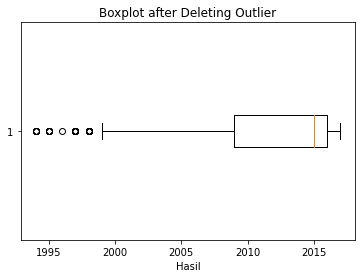

In [ ]:
plt.boxplot(df['tahunrilis'], vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Hasil')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

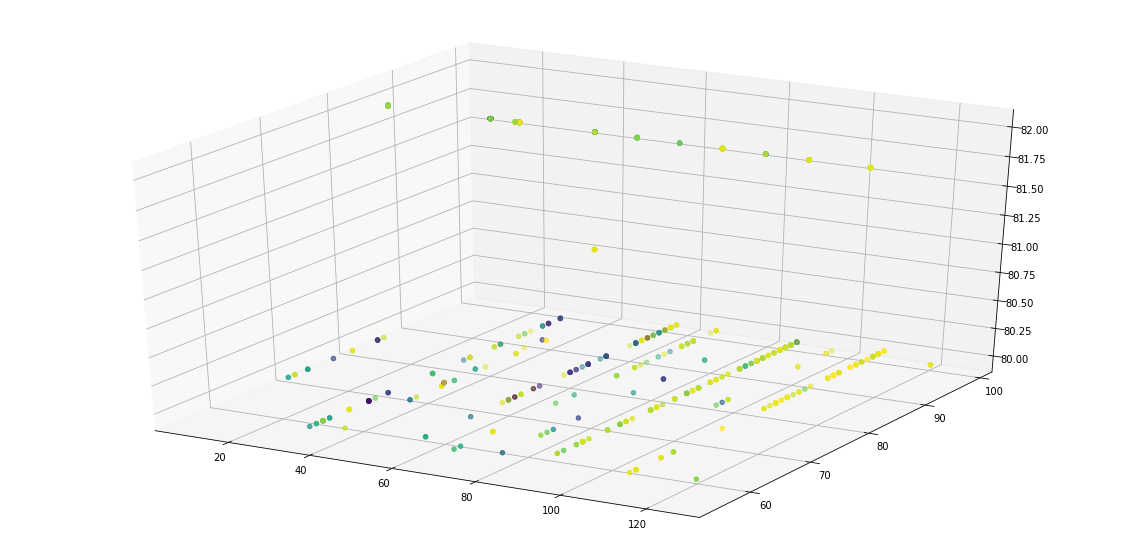

In [ ]:
xs = df.deskripsirating
ys = df.skorpenilaianpengguna
zs = df.ukuranperingkatpengguna
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs, c=df.tahunrilis)
plt.show()

#**Pemodelan**

sebelum dilakukan pemodelan terhadap data lebih lanjut, kita cek lagi datanya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   judul                    949 non-null    object 
 1   rate usia                949 non-null    object 
 2   levelperingkat           949 non-null    object 
 3   deskripsirating          949 non-null    int64  
 4   tahunrilis               949 non-null    int64  
 5   skorpenilaianpengguna    949 non-null    float64
 6   ukuranperingkatpengguna  949 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 59.3+ KB


In [ ]:
df.describe()

,deskripsirating,tahunrilis,skorpenilaianpengguna,ukuranperingkatpengguna
count,949.000000,949.000000,949.000000,949.000000
mean,68.704953,2011.692308,84.409905,80.780822
std,30.915998,6.206210,9.459527,0.972410
min,10.000000,1994.000000,55.000000,80.000000
25%,41.000000,2009.000000,84.000000,80.000000
50%,70.000000,2015.000000,84.000000,80.000000
75%,90.000000,2016.000000,91.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


Kita Lakukan dropping data tipe yang berupa objek,karena jika tidak di drop maka codingan dari elbow method tidak akan bisa berjalan

In [ ]:
#Dengan cara ini, Anda memberi tahu python secara eksplisit bahwa Anda tidak ingin mengubah kerangka data asli dan Anda ingin menetapkannya ke variabel baru.
df = df.drop(['judul', 'rate usia', 'levelperingkat'], axis=1, inplace=False)


In [ ]:
df.head()

,deskripsirating,tahunrilis,skorpenilaianpengguna,ukuranperingkatpengguna
0,80,2004,82.0,80
1,100,2006,84.0,82
2,90,2016,98.0,80
3,90,2008,98.0,80
4,70,2014,94.0,80


# **Elbow** **Method**

Kita Menggunakan elbow method untuk menentukan berapa K yang tepat yang dapat memisahkan kelompok/cluster sehingga benar-benar terpisah satu cluster dengan cluster lainnya.

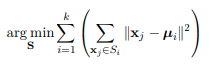

In [ ]:
gd = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    gd.append(kmeans.inertia_)

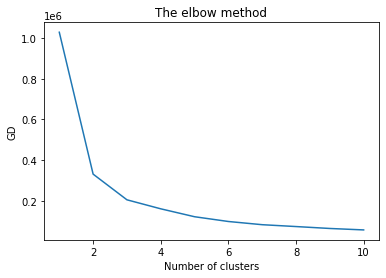

In [ ]:
plt.plot(range(1, 11), gd)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('GD') #within cluster sum of squares
plt.show()

Berdasarkan elbow method diatas, jumlah cluster yang paling baik adalah 3. cara melihatnya adalah dengan melihat cluster 1 sampai 3 penurunannya curam, perubahan nilai GD nya besar. tetapi cluster 3 dan 4 sudah landai sehingga perubahan nilainya tidak terlalu berpengaruh. Jd kita bisa menggunakan K = 3

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(df)

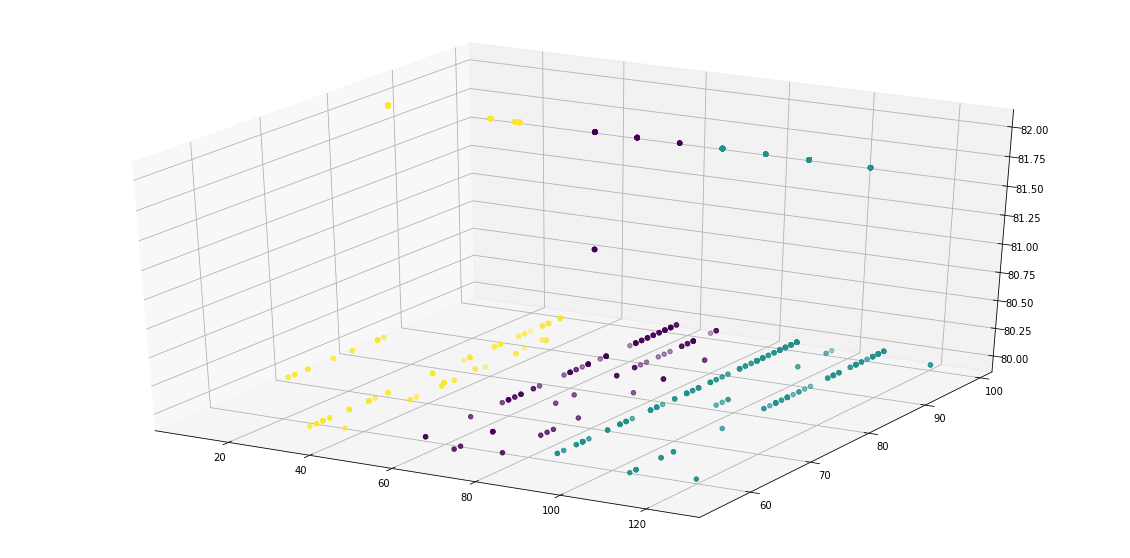

In [ ]:
#Kita simulasikan hasil clustering yang kita dapatkan.
xs = df.deskripsirating
ys = df.skorpenilaianpengguna
zs = df.ukuranperingkatpengguna
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs, c=y_kmeans)
plt.show()

berdasarkan hasil dari clustering diatas didapatkan data daripada kelompok kita ini tidak terlalu bagus, karena data-datanya masih menyebar dan belum ter-cluster dengan baik